<h2>Exploratory Data Analysis</h2>

In [302]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import seed
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras import optimizers
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
import tensorflow as tf
import random as rn
from keras import backend as K

tf.set_random_seed(42)
rn.seed(42)
seed(42)

In [82]:
data_df = pd.read_csv('data.csv')
data_df.shape

(2132, 5)

<b>Check for missing values</b>

In [44]:
data_df = data_df.drop_duplicates(['date', 'temperature', 'venue', 'precipitation'])
data_df.isnull().sum()

id               0 
date             0 
venue            0 
temperature      0 
precipitation    26
dtype: int64

<b>A lot of the precipitation data is either 0 or null so its doubtful how helpful it will be.</b>

In [45]:
len(data_df.loc[(data_df['precipitation'] == 0) | (data_df['precipitation'].isnull())])

1782

<b>There are 28 venues in total</b>

In [80]:
len(data_df.groupby('venue'))

28

<b>American Airlines and Staples Center have much more data than the other venues. They can be dropped as they may a hindrance to generalization. Additionally, each venue has a variable number of data points. </b>

In [83]:
data_df.groupby('venue').count()

,id,date,temperature,precipitation
venue,,,,
American Airlines Center,148,148,148,148
Amway Center,70,70,70,70
At&t Center,74,74,74,74
Bankers Life Fieldhouse,71,71,71,71
Barclays Center,70,70,70,69
Capital Center,68,68,68,68
Chesapeake Energy Arena,69,69,69,69
Fedex Forum,73,73,73,73
Fiserv Forum,72,72,72,72


<b>Temperature is recorded on different dates at different venues and the recordings are irregularly spaced. The only common periods among 3 years are two periods between October and January and about 3 weeks in July in 2017 and 2018.</b>

In [47]:
data_df.groupby('date').count()

,id,venue,temperature,precipitation
date,,,,
2017-07-01,3,3,3,3
2017-07-02,3,3,3,3
2017-07-03,4,4,4,4
2017-07-04,3,3,3,3
2017-07-05,5,5,5,5
2017-07-06,5,5,5,5
2017-07-07,6,6,6,6
2017-07-08,8,8,8,8
2017-07-09,8,8,8,8


<h2>Data Processing and Feature Extraction</h2>

In [406]:
# Read data and get rid of duplicate data
data_df = pd.read_csv('data.csv')
data_df = data_df.drop_duplicates(['date', 'temperature', 'venue', 'precipitation'])

# Fill NaN values with -1
data_df = data_df.fillna(-1)

# Extract week of each recording
data_df['week'] = np.ceil(data_df.apply(lambda x: x['date'].split('-')[2],axis=1).apply(pd.to_numeric) / 7)

# Convert date column to datetime type and sort dataframe by date
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.sort_values(by=['date'], inplace=True, ascending=True)

# Narrow date range
year1_df = data_df.loc[(data_df['date'] >= '2017-10-16') & (data_df['date'] <= '2018-01-31')].copy()
year2_df = data_df.loc[(data_df['date'] >= '2018-10-16') & (data_df['date'] <= '2019-01-31')].copy()

# Extract interval between recordings for each recording, separately for each year
year1_df.sort_values(by=['venue','date'], inplace=True, ascending=True)
year1_df['date_shifted'] = year1_df['date'].shift(periods=1)
year1_df['interval'] = (year1_df['date'] - year1_df['date_shifted']).dt.days
year1_df['interval'] = year1_df['interval'].apply(lambda x: 0 if x < 0 else x)
year2_df.sort_values(by=['venue','date'], inplace=True, ascending=True)
year2_df['date_shifted'] = year2_df['date'].shift(periods=1)
year2_df['interval'] = (year2_df['date'] - year2_df['date_shifted']).dt.days
year2_df['interval'] = year2_df['interval'].apply(lambda x: 0 if x < 0 else x)

# Group by venue for further processing
year1_df = year1_df.groupby('venue')['temperature','precipitation','interval','week'].agg(lambda x: list(x))
year2_df = year2_df.groupby('venue')['temperature','precipitation','interval','week'].agg(lambda x: list(x))

# Drop American Airlines Center and Staples Center
year1_df = year1_df.drop(['American Airlines Center','Staples Center']).reset_index()
year2_df = year2_df.drop(['American Airlines Center','Staples Center']).reset_index()

# Extract lists of features by year
year1_df_temp = year1_df['temperature'].values
year2_df_temp = year2_df['temperature'].values
year1_df_prec = year1_df['precipitation'].values
year2_df_prec = year2_df['precipitation'].values
year1_df_interval = year1_df['interval'].values
year2_df_interval = year2_df['interval'].values
year1_df_week = year1_df['week'].values
year2_df_week = year2_df['week'].values

X = []
y = []

# Compile training data and labels. All features are of 15 previous time steps.
for (item1,item2,item3,item4) in zip(year1_df_temp, year1_df_prec, year1_df_interval, year1_df_week):
    X.append(np.array([np.array(i) for i in zip(item1[-19:-1], item2[-19:-1], item3[-19:-1], item4[-19:-1])]))
    y.append(item1[-1])

for (item1,item2,item3,item4) in zip(year2_df_temp, year2_df_prec, year2_df_interval, year2_df_week):
    X.append(np.array([np.array(i) for i in zip(item1[-19:-1], item2[-19:-1], item3[-19:-1], item4[-19:-1])]))
    y.append(item1[-1])
    
# Prepare Capital Center data for prediction
test_data = []
test_df =  year2_df.loc[year2_df['venue'] == 'Capital Center']
for (item1,item2,item3,item4) in zip(test_df['temperature'].values, test_df['precipitation'].values, test_df['interval'].values, test_df['week'].values):
    test_data.append(np.array([np.array(i) for i in zip(item1[-18:], item2[-18:], item3[-18:], item4[-18:])]))

# Create training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
np.array(X_train).shape

(46, 18, 4)

<h2>Build the model and train</h2>

Train on 46 samples, validate on 6 samples
Epoch 1/200
46/46 [==============================] - 22s 467ms/step - loss: 1766.4292 - val_loss: 1584.2754
Epoch 2/200
46/46 [==============================] - 0s 342us/step - loss: 1325.4379 - val_loss: 1110.4012
Epoch 3/200
46/46 [==============================] - 0s 421us/step - loss: 918.4052 - val_loss: 710.7637
Epoch 4/200
46/46 [==============================] - 0s 561us/step - loss: 574.5776 - val_loss: 391.4197
Epoch 5/200
46/46 [==============================] - 0s 430us/step - loss: 296.1018 - val_loss: 167.9684
Epoch 6/200
46/46 [==============================] - 0s 411us/step - loss: 121.0873 - val_loss: 98.1184
Epoch 7/200
46/46 [==============================] - 0s 698us/step - loss: 77.1564 - val_loss: 130.3342
Epoch 8/200
46/46 [==============================] - 0s 707us/step - loss: 126.4724 - val_loss: 170.7276
Epoch 9/200
46/46 [==============================] - 0s 634us/step - loss: 162.5777 - val_loss: 179.9497
Epoch 10/

Epoch 79/200
46/46 [==============================] - 0s 621us/step - loss: 23.6670 - val_loss: 26.6803
Epoch 80/200
46/46 [==============================] - 0s 630us/step - loss: 22.5779 - val_loss: 27.4529
Epoch 81/200
46/46 [==============================] - 0s 1ms/step - loss: 22.2351 - val_loss: 24.9072
Epoch 82/200
46/46 [==============================] - 0s 631us/step - loss: 21.4281 - val_loss: 26.0706
Epoch 83/200
46/46 [==============================] - 0s 785us/step - loss: 20.7639 - val_loss: 25.4130
Epoch 84/200
46/46 [==============================] - 0s 915us/step - loss: 20.0176 - val_loss: 21.6987
Epoch 85/200
46/46 [==============================] - 0s 835us/step - loss: 19.1520 - val_loss: 20.2511
Epoch 86/200
46/46 [==============================] - 0s 819us/step - loss: 18.7016 - val_loss: 22.1269
Epoch 87/200
46/46 [==============================] - 0s 1ms/step - loss: 18.6046 - val_loss: 22.1745
Epoch 88/200
46/46 [==============================] - 0s 1ms/step - 

Epoch 158/200
46/46 [==============================] - 0s 723us/step - loss: 2.0910 - val_loss: 14.1629
Epoch 159/200
46/46 [==============================] - 0s 641us/step - loss: 2.1944 - val_loss: 14.8806
Epoch 160/200
46/46 [==============================] - 0s 613us/step - loss: 1.8080 - val_loss: 17.1789
Epoch 161/200
46/46 [==============================] - 0s 839us/step - loss: 1.7775 - val_loss: 16.8458
Epoch 162/200
46/46 [==============================] - 0s 658us/step - loss: 1.7396 - val_loss: 13.0141
Epoch 163/200
46/46 [==============================] - 0s 927us/step - loss: 1.6180 - val_loss: 13.5527
Epoch 164/200
46/46 [==============================] - 0s 934us/step - loss: 1.5344 - val_loss: 15.3511
Epoch 165/200
46/46 [==============================] - 0s 1ms/step - loss: 1.5042 - val_loss: 13.8238
Epoch 166/200
46/46 [==============================] - 0s 1ms/step - loss: 1.5696 - val_loss: 15.7116
Epoch 167/200
46/46 [==============================] - 0s 872us/step

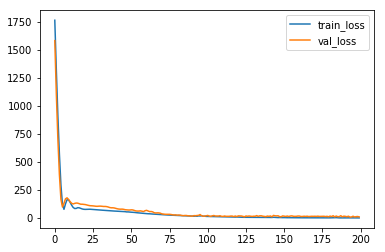

In [407]:
n_features = 4
n_seq = 3
n_steps = 6

# Reshape input data
X_train = np.asarray(X_train).reshape((np.asarray(X_train).shape[0], n_seq, n_steps, n_features))
X_test = np.asarray(X_test).reshape((np.asarray(X_test).shape[0], n_seq, n_steps, n_features))

# Define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=50,restore_best_weights=True)
# Fit model
train_history = model.fit(X_train, y_train,
                    batch_size=np.asarray(X_train).shape[0], epochs=200,
                    verbose=1, validation_data=(X_test, y_test),callbacks=[es])

# Calculate and print loss and plot showing training and validation loss
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['train_loss', 'val_loss'])
plt.show()

<h2>Make predictions </h2>

In [408]:
# Make predictions on validation data
yhat = model.predict(X_test, verbose=0)
print(yhat)
print(y_test)

[[77.83103 ]
 [10.07132 ]
 [22.613676]
 [50.482548]
 [51.01811 ]
 [59.592087]]
[81.07, 10.84, 21.96, 54.98, 46.42, 56.97]


In [409]:
# Make prediction on Capital Center data
test_data = np.asarray(test_data).reshape((np.asarray(test_data).shape[0], n_seq, n_steps, n_features))
model.predict(test_data, verbose=0)

array([[33.776615]], dtype=float32)

<h2>Plots to show deviation of predicted values from ground truth</h2>

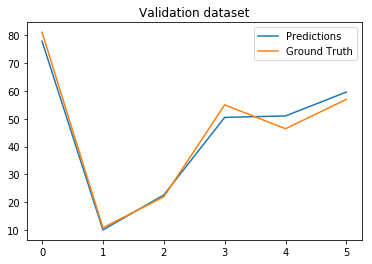

In [410]:
plt.plot(yhat, label="Predictions")
plt.plot(y_test, label="Ground Truth")
plt.legend()
plt.title('Validation dataset')
plt.show()

In [411]:
yhat_train = model.predict(X_train, verbose=0)

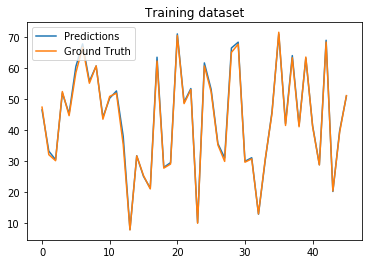

In [412]:
plt.plot(yhat_train, label="Predictions")
plt.plot(y_train, label="Ground Truth")
plt.legend()
plt.title('Training dataset')
plt.show()

References:
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/